In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from IPython.display import FileLink
import colorsys

# 0. Introduction 
## 0.1 Explication de l'outil
Ce carnet permet de compiler du code en `python` avec des interlude textuelles. Il permet de générer tous les graphiques de résultats d'indicateurs de la RE2020.
## 0.2 Sommaire
1. Données d'entrées
2. RE2020
    2.1 Bbio  
    2.2 CEP & CEPnr  
    2.3 DH  
    2.4 Ic energie  
    2.5 Ic construction
   
3. RT2012
    3.1 Bbio  
    3.2 CEP  
    3.3 TIC  

## 0.3 Amélioration WIP

1. Ajouter une suppréssion automatique des values et labels legend si la valeur est 0. [FAIT]
2. ajouter les DH avec échelle à part [FAIT]
3. Gerer avec le cas où l'on ne veut pas l'un des graphs
4. Gerer les négatifs si PV en -
5. Mieux gerer les couleurs des barres de valeurs
6. afficher les valeurs dans la légende ? 

# 1 Données d'entrées  
C'est la seule partie à rentrer par l'utilisateur. Il faut remplir les résultats du calcul RE2020 dans les cases ci-dessous

In [55]:
nbRange = 5 #nombre de cases du fond
HeightBar = 6 #hauteur des bars
heightFond = 18 #hauteur du fond
graduationx = [5,10,10,10,50] # graduation de l'axe x pour dans l'ordre : Bbbio, CEP, CEPnr, Ic energie, DH

## Données affiché sur les graphs

In [56]:
titre = "RE2020 : Résultats des indicateurs énergie" 
sousTitre = "Les objectifs sur le Bbio et le CEP sont bien respectés"
infos = "Projet XXXXX - Phase XXXX - Calcul du xx/xx/20xx - Pléiades version 6.xx.xx.x - WSP France ©"

## 1.1 Bbio

In [57]:
BbioChaud = 10
BbioFroid = 15
BbioEcl =30
Bbiomax = 66

## 1.2 CEP et CEPnr

In [58]:
CEPch = 15 #CEP chauffage
CEPfr = 15 #CEP climatisation
CEPecs = 15 #CEP eau chaude sanitaire
CEPecl = 15 #CEP éclairage
CEPauxV = 15 #CEP auxiliaires de ventilation
CEPauxD = 12 #CEP auxiliaires de distribution
CEPdep = 2 #CEP déplacements
CEPmax = 90# Seuil du CEP

CEPnrch = 6 #CEP chauffage
CEPnrfr = 11 #CEP climatisation
CEPnrecs = 8 #CEP eau chaude sanitaire
CEPnrecl = 5 #CEP éclairage
CEPnrauxV = 9 #CEP auxiliaires de ventilation
CEPnrauxD = 7 #CEP auxiliaires de distribution
CEPnrdep = 0 #CEP déplacements
CEPnrmax = 60# Seuil du CEP


## 1.3 Ic énergie et Ic construction

In [59]:
#En [kg;eq CO2/m²_Sref]
IcEelec = 105 #Ic de l'électricité
IcEbois = 10 #Ic du bois
IcErcu = 0 # Ic de réseau de chaleur et froid
IcEfioul = 0 #Ic du fioul
IcEgaz = 15 #Ic du gaz 

IcEmax = 200 #valeur max du Ic énergie

#En [kg;eq CO2/m²_Sref]
IcConstructionLot1 = 0 #VRD
IcConstructionLot2 = 0 # Fondations et infrastructures
IcConstructionLot3 = 0 # Superstructure
IcConstructionLot4 = 0 # Couverture - Etanchéité - Charpente - Zinguerie
IcConstructionLot5 = 0 # Cloisonnement Doublage Plafonds suspendus Menuiseries intérieurs
IcConstructionLot6 = 0 #Facades et menuiseries extérieures
IcConstructionLot7 = 0 # Revetements des sols, murs et plafonds - Chape - Peinture - Produits et décoration
IcConstructionLot8 = 0 #CVC (Chauffage - Ventilation - Refroidissement - ECS)
IcConstructionLot9 = 0 # Installation sanitaire
IcConstructionLot10 = 0 #Réseaux d'énergie (courant fort)
IcConstructionLot11 = 0 #Réseaux de communications (courant faible)

IcConstructionmax = 980

## 1.4 DH

In [60]:
DH= 950
DHmax=1150

# NE PAS TOUCHER LE CODE SUIVANT SI VOUS NE SAVEZ PAS CE QUE VOUS FAITE 
# Les cases suivantes contiennent le code de calcul et de génération des graphiques. Il suffit de les exucuter pour faire apparaitre les graphiques. 

In [61]:
#nbRange = num_colors #nombre de catégories fond
satLow = 0.5
satHigh = 0.8
lightLow=0.5
lightHigh=0.9

# données dérivées Bbio : 
bbio = BbioChaud +BbioFroid +BbioEcl
valuesBbio = [BbioChaud,BbioFroid,BbioEcl] #liste des données Bbio à plot en Bar empilées
labelsBbio = [f"Chauffage : {BbioChaud}", f"Climatisation: {BbioFroid}", f"Eclairage: {BbioEcl}"] #label et valeurs pour la légende
colorsBbio = sns.color_palette("ch:s=0,r=.5,d=0.2,l=.75,reverse=1", n_colors=len(valuesBbio),desat=0) #palette de couleur des barres H
# METHODE HSL - extended_colorsBbio = [colorsys.hls_to_rgb(h, l, s) for h,l,s in zip(np.linspace(0, 0.05, nbRange),np.linspace(lightLow, lightHigh, nbRange),np.linspace(satLow,satHigh, nbRange))]
extended_colorsBbio = sns.color_palette("ch:s=-1,r=.1,d=0.25,l=.95,g=.35,reverse=1", n_colors=nbRange) #palette du fond par segments
valuesFondBbio = [Bbiomax / nbRange] * nbRange #valeurs pour tracer le fond en catégorie égal, avec nbRange cases
gaucheFondBbio = np.cumsum(valuesFondBbio)-valuesFondBbio[0] #valeurs pour décaller le tracé des barh afin de faire un graph empilé
valuesBbio, labelsBbio = zip(*[(v, l) for v, l in zip(valuesBbio, labelsBbio) if v != 0]) #suppression des valeurs zéros pour des jolies légendes :)
valuesBbio = list(valuesBbio) # Conversion en liste (zip retourne des tuples)
labelsBbio = list(labelsBbio) # Conversion en liste (zip retourne des tuples)

# données dérivées CEP : 
CEP = CEPch+CEPfr+CEPecs+CEPecl+CEPauxV+CEPauxD+CEPdep
valuesCEP = [CEPch,CEPfr,CEPecs,CEPecl,CEPauxV,CEPauxD,CEPdep]
labelsCEP = [f"Chauffage:{CEPch}", f"Climatisation:{CEPfr}", f"ECS:{CEPecs}",f"Éclairage:{CEPecl}",f"Aux. de ventil.:{CEPauxV}",f"Aux. de distrib.:{CEPauxD}",f"Déplacements:{CEPdep}"]
colorsCEP = sns.color_palette("ch:s=-0.8,r=.5,d=0.2,l=.75,reverse=1", n_colors=len(valuesCEP),desat=0)
extended_colorsCEP =sns.color_palette("ch:s=-.15,r=.1,d=0.25,l=.95,g=.35,reverse=1", n_colors=nbRange)
valuesFondCEP = [CEPmax / nbRange] * nbRange 
gaucheFondCEP = np.cumsum(valuesFondCEP)-valuesFondCEP[0]
valuesCEP, labelsCEP = zip(*[(v, l) for v, l in zip(valuesCEP, labelsCEP) if v != 0])
valuesCEP = list(valuesCEP) # Conversion en liste si nécessaire (zip retourne des tuples)
labelsCEP = list(labelsCEP) # Conversion en liste si nécessaire (zip retourne des tuples)

# données dérivées CEPnr : 
CEPnr = CEPnrch+CEPnrfr+CEPnrecs+CEPnrecl+CEPnrauxV+CEPnrauxD+CEPnrdep
valuesCEPnr = [CEPnrch,CEPnrfr,CEPnrecs,CEPnrecl,CEPnrauxV,CEPnrauxD,CEPnrdep]
labelsCEPnr = [f"Chauffage:{CEPnrch}", f"Climatisation:{CEPnrfr}", f"ECS:{CEPnrecs}",f"Éclairage:{CEPnrecl}",f"Aux. de ventil.:{CEPnrauxV}",f"Aux. de distrib.:{CEPnrauxD}",f"Déplacements:{CEPnrdep}"]
colorsCEPnr = sns.color_palette("ch:s=-0.05,r=.5,d=0.2,l=.75,reverse=1", n_colors=len(valuesCEPnr),desat=0)
extended_colorsCEPnr = sns.color_palette("ch:s=-.15,r=.1,d=0.25,l=.95,g=.35,reverse=1", n_colors=nbRange)
valuesFondCEPnr = [CEPnrmax / nbRange] * nbRange 
gaucheFondCEPnr = np.cumsum(valuesFondCEPnr)-valuesFondCEPnr[0]
valuesCEPnr, labelsCEPnr = zip(*[(v, l) for v, l in zip(valuesCEPnr, labelsCEPnr) if v != 0])
valuesCEPnr = list(valuesCEPnr) # Conversion en liste si nécessaire (zip retourne des tuples)
labelsCEPnr = list(labelsCEPnr) # Conversion en liste si nécessaire (zip retourne des tuples)

# données dérivées IcE : 
IcE = IcEelec+IcEbois+IcErcu+IcEfioul+IcEgaz
valuesIcE = [IcEelec,IcEbois,IcErcu,IcEfioul,IcEgaz]
labelsIcE = [f"Elec:{IcEelec}", f"Bois:{IcEbois}", f"RCU:{IcErcu}",f"Fioul:{IcEfioul}",f"Gaz:{IcEgaz}"]
colorsIcE = sns.color_palette("ch:s=0,r=.5,d=0.2,l=.75,reverse=1", n_colors=len(valuesIcE),desat=0)
extended_colorsIcE = sns.color_palette("ch:s=0.5,r=.1,d=0.25,l=.95,g=0.35,reverse=1", n_colors=nbRange)
valuesFondIcE = [IcEmax / nbRange] * nbRange 
gaucheFondIcE = np.cumsum(valuesFondIcE)-valuesFondIcE[0]
valuesIcE, labelsIcE = zip(*[(v, l) for v, l in zip(valuesIcE, labelsIcE) if v != 0])
valuesIcE = list(valuesIcE) # Conversion en liste si nécessaire (zip retourne des tuples)
labelsIcE = list(labelsIcE) # Conversion en liste si nécessaire (zip retourne des tuples)


# données dérivées DH : 
valuesDH=[DH]
labelsDH=[f'Degrés-heure:{DH}°C/h']
colorsDH = sns.color_palette("ch:s=0,r=.5,d=0,l=.2,reverse=1", n_colors=len(valuesDH),desat=0)
extended_colorsDH = sns.color_palette("ch:s=2.5,r=.1,d=0.25,l=.95,g=0.35,reverse=1", n_colors=nbRange)
valuesFondDH = [DHmax / nbRange] * nbRange 
gaucheFondDH = np.cumsum(valuesFondDH)-valuesFondDH[0]
 
# vecteurs toute données pour légendes
seuils = [Bbiomax,CEPmax,CEPnrmax,IcEmax,DHmax]
valeurs = [bbio,CEP,CEP,IcE,DH]
labels = ["Bbio","CEP","CEPnr","Ic,energie",'DH']

# Résultats

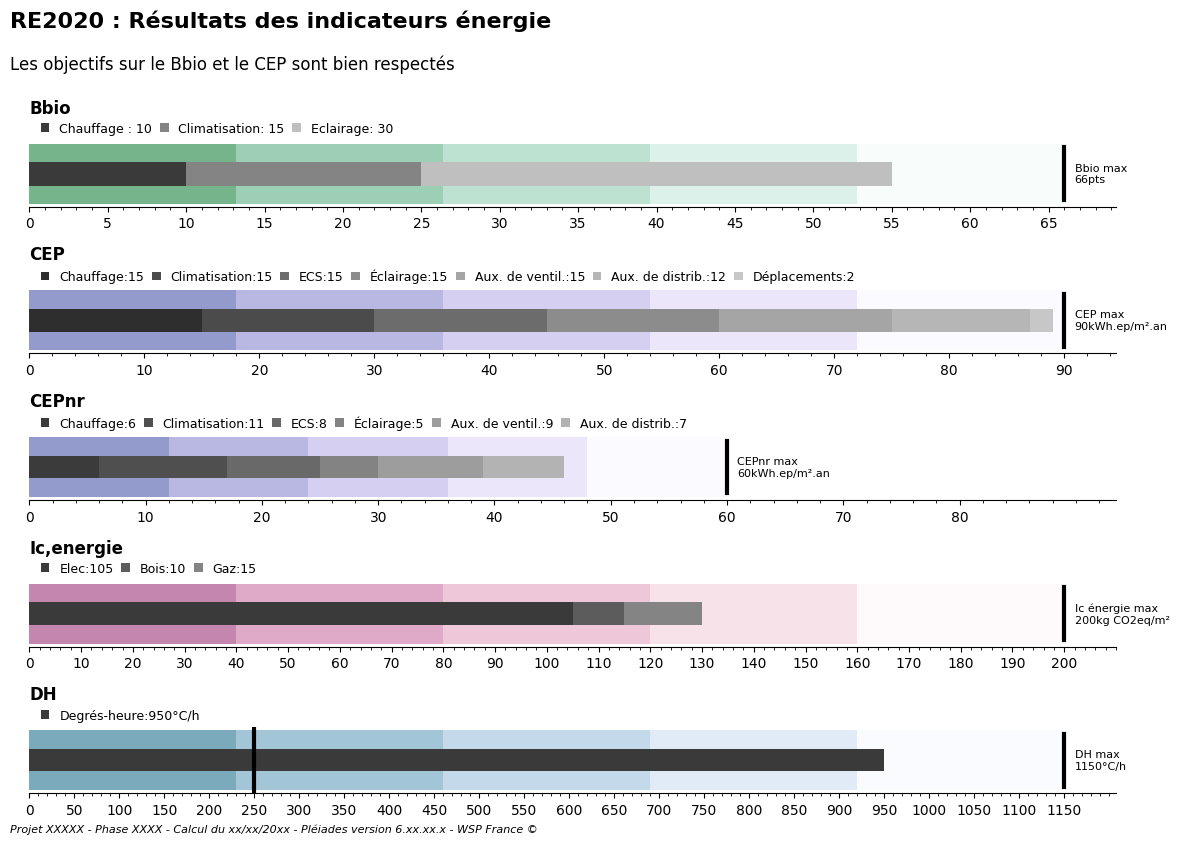

Lien de téléchargement du graph :


C:\Users\FRLC03195\RE2020 : Résultats des indicateurs énergie.png

In [63]:
#Creation de la figure et paramètrage des axes

fig, ax1 = plt.subplots(5,1)

#Bbio
ax1[0].barh(1,valuesFondBbio,left=gaucheFondBbio,height=15,color=extended_colorsBbio); #Compartiments du fond Bbio
ax1[0].barh(1,valuesBbio,color=colorsBbio,left=np.insert(np.cumsum(valuesBbio),0,0)[:-1],height=HeightBar,label=labelsBbio,zorder=3); #Bar empilée du Bbio
ax1[0].axvline(Bbiomax, color="black", ymin=0.10, ymax=0.9,linewidth=3); #bar cible Bbio max
ax1[0].text(1.01*Bbiomax,1,f"Bbio max\n{Bbiomax}pts",rotation=0,fontsize=8,ha='left',va='center') #Text Bbbio max

#CEP
ax1[1].barh(1,valuesFondCEP,left=gaucheFondCEP,height=HeightBar+10,color=extended_colorsCEP); #Compartiments du fond CEP
ax1[1].barh(1,valuesCEP,color=colorsCEP,left=np.insert(np.cumsum(valuesCEP),0,0)[:-1],height=HeightBar,label=labelsCEP,zorder=3);#Bar empilée du CEP
ax1[1].axvline(CEPmax, color="black", ymin=0.10, ymax=0.9,linewidth=3,zorder=4); #bar cible CEP max
ax1[1].text(1.01*CEPmax,1,f"CEP max\n{CEPmax}kWh.ep/m².an",rotation=0,fontsize=8,ha='left',va='center',zorder=4) #Text CEP max

#CEPnr
ax1[2].barh(1,valuesFondCEPnr,left=gaucheFondCEPnr,height=HeightBar+10,color=extended_colorsCEPnr); #Compartiments du fond CEPnr
ax1[2].barh(1,valuesCEPnr,color=colorsCEPnr,left=np.insert(np.cumsum(valuesCEPnr),0,0)[:-1],height=HeightBar,label=labelsCEPnr,zorder=3);#Bar empilée du CEPnr  label=labelsCEPnr
ax1[2].axvline(CEPnrmax, color='black', ymin=0.10, ymax=0.9,linewidth=3,zorder=4); #bar cible CEPnr max
ax1[2].text(1.015*CEPnrmax,1,f"CEPnr max\n{CEPnrmax}kWh.ep/m².an",rotation=0,fontsize=8,ha='left',va='center',zorder=4) #Text CEPnr max

#Ic energie
ax1[3].barh(1,valuesFondIcE,left=gaucheFondIcE,height=HeightBar+10,color=extended_colorsIcE); #Compartiments du fond Ic energie
ax1[3].barh(1,valuesIcE,color=colorsIcE,left=np.insert(np.cumsum(valuesIcE),0,0)[:-1],height=HeightBar,label=labelsIcE,zorder=3);#Bar empilée du Ic énergie
ax1[3].axvline(IcEmax, color="black", ymin=0.10, ymax=0.9,linewidth=3,zorder=4); #bar cible Ic energie max
ax1[3].text(1.01*IcEmax,1,f"Ic énergie max\n{IcEmax}kg CO2eq/m²",rotation=0,fontsize=8,ha='left',va='center',zorder=4) #Text Ic énergie max

#DH
ax1[4].barh(1,valuesFondDH,left=gaucheFondDH,height=HeightBar+10,color=extended_colorsDH); #Compartiments du fond DH
ax1[4].barh(1,valuesDH,color=colorsDH,left=np.insert(np.cumsum(valuesDH),0,0)[:-1],height=HeightBar,label=labelsDH,zorder=3);#Bar empilée du DH
ax1[4].axvline(DHmax, color="black", ymin=0.10, ymax=0.9,linewidth=3,zorder=4); #bar cible DH max
ax1[4].text(1.01*DHmax,1,f"DH max\n{DHmax}°C/h",rotation=0,fontsize=8,ha='left',va='center',zorder=4) #Text DH max
ax1[4].axvline(250, color="black", ymin=0.0, ymax=1,linewidth=3,zorder=4); #bar cible DH max

#taille du graph
fig.set_size_inches(30/2.54,19/2.54) #affichage
fig.set_dpi(100)

for i in range(5) :
    ax1[i].set_xlim(0, 1.05*max(seuils[i],valeurs[i]))  # Définit l'intervalle de l'axe x
    ax1[i].get_xaxis().tick_bottom()  # Active les ticks de l'axe x en bas
    ax1[i].set_yticks([])
    #ax1[i].set_yticklabels([labels[i]],rotation=90,fontsize=14,fontweight="bold",va='center')
    #ax1[i].xaxis.grid(alpha=0.8,zorder=0)
    ax1[i].minorticks_on()
    ax1[i].set_xticks(np.arange(0, 1+max(seuils[i],valeurs[i]), graduationx[i]))
    ax1[i].spines['top'].set_visible(False)
    ax1[i].spines['right'].set_visible(False)
    ax1[i].spines['left'].set_visible(False)
    ax1[i].spines['bottom'].set_visible(True)
    ax1[i].set_title(labels[i], loc='left', pad=20,fontweight='bold',fontsize=12)
    ax1[i].legend(loc="upper left",frameon=False,ncol=7,bbox_to_anchor=(0, 1.45),fontsize=9,handlelength=.7,columnspacing=0.6)  
    

fig.tight_layout()
fig.suptitle(titre, x=0, y=1.1, horizontalalignment='left',fontweight='bold',fontsize=16);
fig.text(0,1.02,sousTitre,horizontalalignment='left',fontsize=12);
fig.text(0,0,infos,horizontalalignment='left',fontsize=8,style="italic");


fig.savefig(f"{titre}.png",dpi=250,bbox_inches="tight")
plt.show()
print("Lien de téléchargement du graph :")
display(FileLink(f"{titre}.png"))


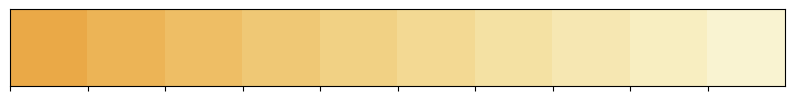

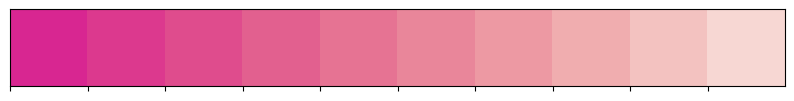

In [54]:
#TEST HSL COLOR PALETTES
saturation = 1  # High saturation
lightness = 0.5
# Generate a gradient of hues
hues = np.linspace(.1, .1+2/50, nbRange)
lightness = np.linspace(0.6, 0.9, nbRange)
saturation = np.full(nbRange, 0.8)


#Convert HLS to RGB using colorsys
palette_hls = [colorsys.hls_to_rgb(h, l, s) for h,l,s in zip(hues,lightness,saturation)]

# Visualize the palette
sns.palplot(palette_hls)

# Generate a gradient of hues
hues = np.linspace(-0.1,1/50, nbRange)
lightness = np.linspace(0.5, 0.9, nbRange)
saturation = np.full(nbRange, 0.7)


#Convert HLS to RGB using colorsys
palette_hls = [colorsys.hls_to_rgb(h, l, s) for h,l,s in zip(hues,lightness,saturation)]

# Visualize the palette
sns.palplot(palette_hls)
plt.show()
